In [1]:
import glob
import matplotlib
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk

from math import radians, cos, sin, asin, sqrt, pi
from pathlib import Path

In [2]:
%%capture

%run pandas_solution_analysis.ipynb

In [3]:
def scaling_func(poi_dict):
    x_max = max(poi_dict.values())
    x_min = min(poi_dict.values())
    
    for k, v in poi_dict.items():
        poi_dict[k] = round(10*(2*v - x_max - x_min)/(x_max - x_min), 3)
    
    return poi_dict 

#### By count only, POI3 > POI1 > POI4. Moreover, density also higher as radius of POI3 is much smaller.

In [4]:
poi_distance_radius_df

,radius,request_count,density
POIID,,,
POI1,11531.820832,8749,0.000021
POI3,1474.580962,8802,0.001289
POI4,9349.572770,422,0.000002


In [6]:
count_dict = poi_distance_radius_df['request_count'].to_dict()

In [7]:
scaled_dict = scaling_func(count_dict)

Not a lot of dispersion in values...

In [8]:
print(scaled_dict)

{'POI1': 9.874, 'POI3': 10.0, 'POI4': -10.0}


#### Density-wise, POI3 > POI1 > POI4. Now the gap between POI1 and POI4 is too small.

In [9]:
density_dict = poi_distance_radius_df['density'].to_dict()

In [10]:
scaled_dict = scaling_func(density_dict)

In [11]:
print(scaled_dict)

{'POI1': -9.698, 'POI3': 10.0, 'POI4': -10.0}


In [12]:
result_df

,POIID,Distance
_ID,,
4516516,POI3,593.413441
4516547,POI3,677.309655
4516550,POI3,569.647737
4516600,POI3,634.733996
4516613,POI3,634.733996
...,...,...
5614689,POI3,674.211228
5614801,POI3,522.019302
5614909,POI3,461.995129


POI1 and POI4 have outliers.

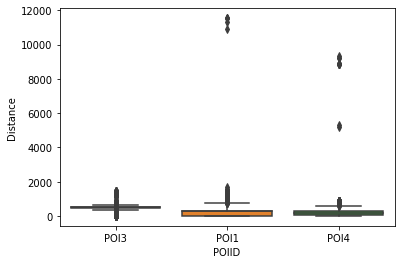

In [13]:
ax = sns.boxplot(x='POIID', y='Distance', data=result_df)

#### Mean distance for POI3 is higher than the other two. POI3's higher density is also obvious.

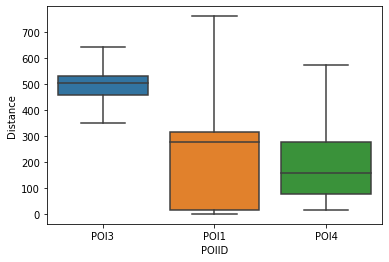

In [14]:
ax = sns.boxplot(x='POIID', y='Distance', data=result_df, showfliers=False)

#### Visualizing distances for POI3

In [16]:
criteria = (result_df['POIID'] == 'POI3')
poi3_df = result_df.loc[criteria, :]

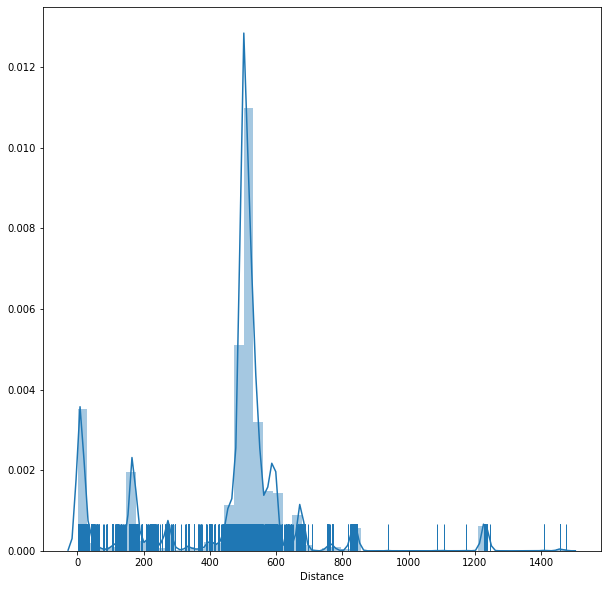

In [17]:
plt.figure(figsize = (10, 10))
sns.distplot(poi3_df['Distance'], rug=True)

#### Visualizing outliers for POI1 and POI4

From the plots above and below, anything with a distance over the value of 4000 will be classified as an outlier (playing it safe) 

In [18]:
criteria = (result_df['POIID'] == 'POI1')
poi1_df = result_df.loc[criteria, :]

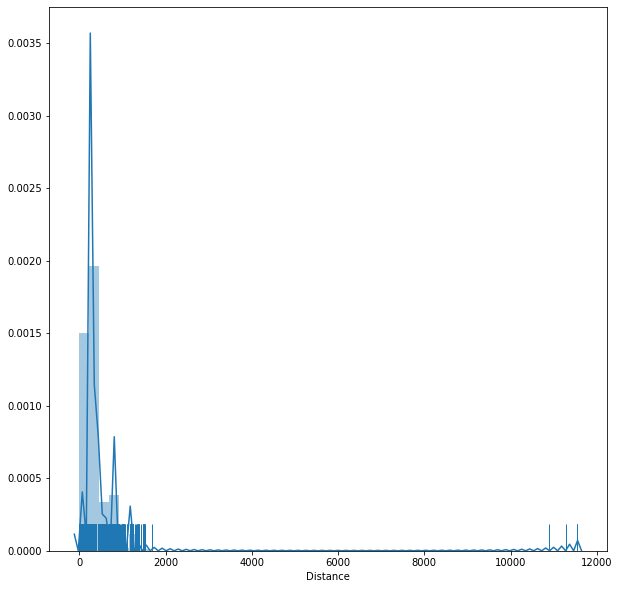

In [19]:
plt.figure(figsize = (10, 10))
sns.distplot(poi1_df['Distance'], rug=True)

In [20]:
criteria = (result_df['POIID'] == 'POI4')
poi4_df = result_df.loc[criteria, :]

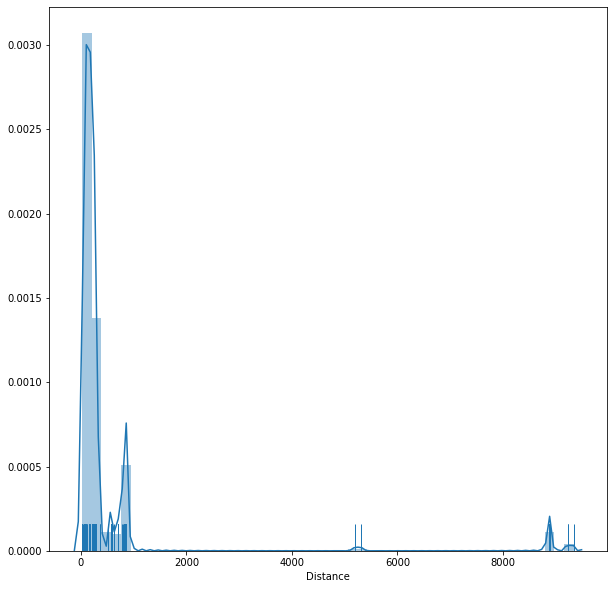

In [21]:
plt.figure(figsize = (10, 10))
sns.distplot(poi4_df['Distance'], rug=True)

#### Filtering out outliers

In [69]:
filter_criteria = (result_df['Distance'] < 4000)

In [70]:
filtered_result_df = result_df.loc[filter_criteria, :]

In [71]:
filtered_result_df

,POIID,Distance
_ID,,
4516516,POI3,593.413441
4516547,POI3,677.309655
4516550,POI3,569.647737
4516600,POI3,634.733996
4516613,POI3,634.733996
...,...,...
5614689,POI3,674.211228
5614801,POI3,522.019302
5614909,POI3,461.995129


In [79]:
group_cols = ['POIID']
filtered_poi_distance_radius_df = filtered_result_df.groupby(group_cols).agg(['max', 'count'])
filtered_poi_distance_radius_df.columns = ['radius', 'request_count']
filtered_poi_distance_radius_df['density'] = filtered_poi_distance_radius_df['request_count']/(pi*pow(filtered_poi_distance_radius_df['radius'], 2))

In [80]:
filtered_poi_distance_radius_df

,radius,request_count,density
POIID,,,
POI1,1684.757584,8744,0.000981
POI3,1474.580962,8802,0.001289
POI4,855.256289,408,0.000178


#### Re-doing the scaling function. Now, using the scaling function on density gives a much better result

In [81]:
count_dict = filtered_poi_distance_radius_df['request_count'].to_dict()

In [83]:
scaled_dict = scaling_func(count_dict)
print(scaled_dict)

{'POI1': 9.862, 'POI3': 10.0, 'POI4': -10.0}


In [84]:
density_dict = filtered_poi_distance_radius_df['density'].to_dict()

In [85]:
scaled_dict = scaling_func(density_dict)
print(scaled_dict)

{'POI1': 4.456, 'POI3': 10.0, 'POI4': -10.0}
